In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains consultation fee of different doctors along with other associated features. The dataset can be used to analyse what factors affect a doctor's consultation fee and a machine learning model can be prepared to predict a doctor's consultation fee.

In [90]:
df = pd.read_excel("Doctor_Final_Train.xlsx")
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [91]:
df.shape

(5961, 7)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Let us preprocess the features for analysis & machine learning model

In [93]:
df['Experience'] = df['Experience'].str.replace('years experience','').astype(int)

Text(0.5, 1.0, 'Years of Experience - Distplot')

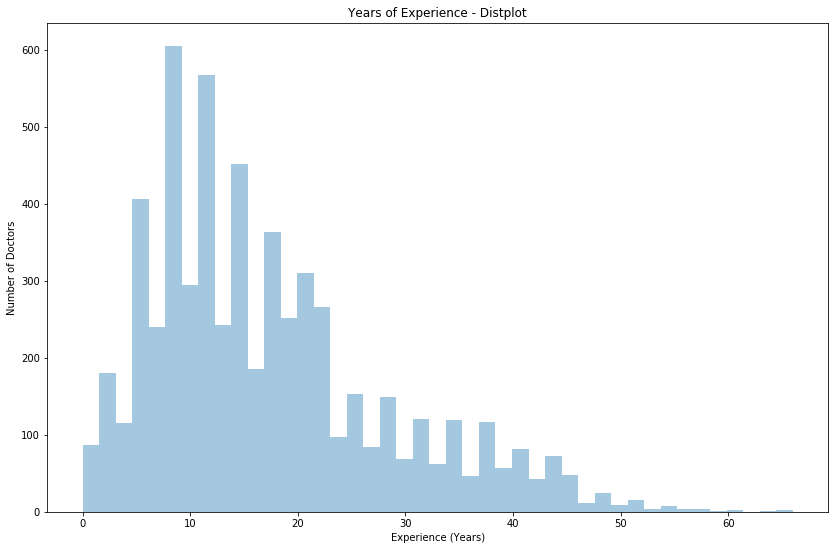

In [94]:
plt.figure(figsize=(14,9))
sns.distplot(df["Experience"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('Experience (Years)')
plt.ylabel('Number of Doctors')
plt.title('Years of Experience - Distplot')

The distribution of experience is skewed to the right

In [95]:
df['Qualification'].value_counts()

BDS                                                                                      488
BHMS                                                                                     477
BAMS                                                                                     471
MBBS                                                                                     334
MBBS, MS - ENT                                                                           220
                                                                                        ... 
BAMS, Post Graduate Diploma in Holistic Healthcare                                         1
MBBS, MD - Dermatology, Fellowship In Cosmetic Dermatology                                 1
MBBS, MD - Acupuncture                                                                     1
BDS, FICD, FICOI                                                                           1
MBBS, MD - Obstetrics & Gynaecology, Fellowship of College of General 

The qualification column contains more than 1420 entries, let's clean the column

In [96]:
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [97]:
df['Qualification'] = df['Qualification'].apply(clean_text)

In [98]:
df['Qualification'].value_counts()

bds                                                                                                                                                        488
bhms                                                                                                                                                       477
bams                                                                                                                                                       471
mbbs                                                                                                                                                       334
mbbs ms ent                                                                                                                                                220
                                                                                                                                                          ... 
bds advanced certificate in endodontics and es

In [99]:
df['Place'].value_counts()

HSR Layout, Bangalore       75
Andheri West, Mumbai        70
Dwarka, Delhi               67
Banjara Hills, Hyderabad    64
Mulund West, Mumbai         54
                            ..
Yakutpura, Hyderabad         1
Koovappady, Ernakulam        1
Cherai, Ernakulam            1
Chitlapakkam, Chennai        1
Dwarka Sector 4, Delhi       1
Name: Place, Length: 877, dtype: int64

Let's clean the Place column as well

In [100]:
def clean_place(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

Let's check for null values in the column before cleaning it

In [101]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Let's fill the missing values for the machine learning model

In [102]:
df['Place'].fillna('missing', inplace=True)

In [103]:
df['Place'] = df['Place'].apply(clean_place)

In [104]:
df['Place'].value_counts()

hsr layout bangalore              75
andheri west mumbai               70
dwarka delhi                      67
banjara hills hyderabad           64
mulund west mumbai                54
                                  ..
bandlaguda hyderabad               1
perumathura thiruvananthapuram     1
shakurpur delhi                    1
perungalathur chennai              1
cherannagar coimbatore             1
Name: Place, Length: 877, dtype: int64

In [105]:
df['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
79%      13
84%      13
81%      12
67%      12
71%       9
76%       9
75%       8
73%       8
60%       7
74%       7
78%       6
56%       5
68%       5
70%       4
69%       4
57%       3
72%       3
63%       2
62%       2
64%       2
55%       2
33%       2
58%       1
40%       1
7%        1
48%       1
45%       1
36%       1
53%       1
47%       1
65%       1
Name: Rating, dtype: int64

Let's fill the null values in rating column before cleaning it & converting it to numeric type

In [106]:
df['Rating'].fillna('0%', inplace=True)

In [107]:
def clean_rating(text):
    text = re.sub(r'%', '', str(text))
    return text

In [108]:
df['Rating'] = df['Rating'].apply(clean_rating)
df['Rating'] = df['Rating'].astype(int)

Text(0.5, 1.0, 'Rating - Distplot')

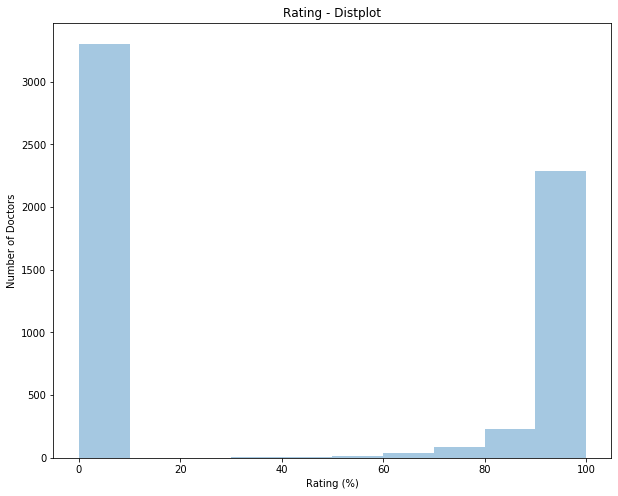

In [109]:
plt.figure(figsize=(10,8))
sns.distplot(df["Rating"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('Rating (%)')
plt.ylabel('Number of Doctors')
plt.title('Rating - Distplot')

All null values in Rating column has been filled with 0% rating, a high proportion of doctors have missing ratings

In [110]:
df['Miscellaneous_Info'].fillna('missing', inplace=True)

In [111]:
df['Miscellaneous_Info'].value_counts()

missing                                                               2620
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth      40
Dental Fillings Zirconia Crowns Dental Implant Fixing                   12
Tooth Extraction Dental Fillings Scaling / Polishing                    12
Skin Allergy Treatment Skin Allergies Dermabrasion                       9
                                                                      ... 
95% 4 Feedback Sanath Nagar, Hyderabad                                   1
100% 16 Feedback HSR Layout, Bangalore                                   1
97% 8 Feedback Adambakkam, Chennai                                       1
96% 15 Feedback Karamana, Thiruvananthapuram                             1
80% 11 Feedback Kilpauk, Chennai                                         1
Name: Miscellaneous_Info, Length: 2999, dtype: int64

Let us extract the number of feedbacks for each doctor from the miscellaneous info column, number of feedbacks is zero wherever it is unavailable

In [112]:
def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

In [113]:
df['Feedback'] = df['Miscellaneous_Info'].apply(get_feedback)
df['Feedback'] = df['Feedback'].str.replace(' Feedback','')
df['Feedback'] = df['Feedback'].astype(int)

In [114]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
Feedback              0
dtype: int64

Text(0.5, 1.0, 'Feedback - Distplot')

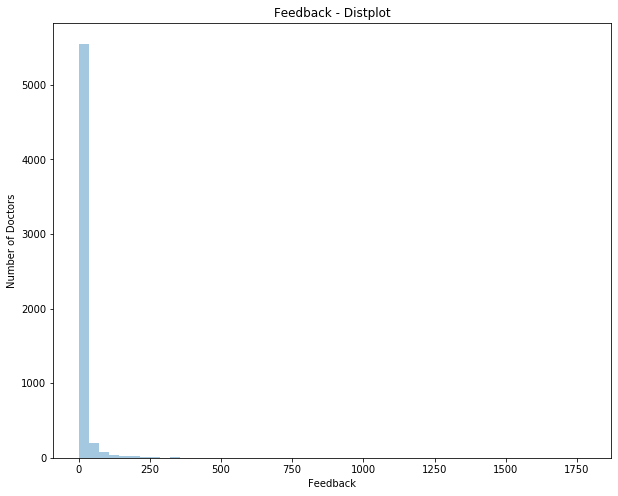

In [115]:
plt.figure(figsize=(10,8))
sns.distplot(df["Feedback"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('Feedback')
plt.ylabel('Number of Doctors')
plt.title('Feedback - Distplot')

A very high proportion of doctors don't have feedback mentioned

Let's extract the miscellaneous fee from the miscellaneous column, fee is assumed 0 wherever it is not mentioned

In [116]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0

In [117]:
df['Misc_Fees'] = df['Miscellaneous_Info'].apply(get_fee)
df['Misc_Fees'] = df['Misc_Fees'].str.replace('₹','')
df['Misc_Fees'].fillna(50, inplace=True)
df['Misc_Fees'] = df['Misc_Fees'].astype(int)

Text(0.5, 1.0, 'Misc_Fees - Distplot')

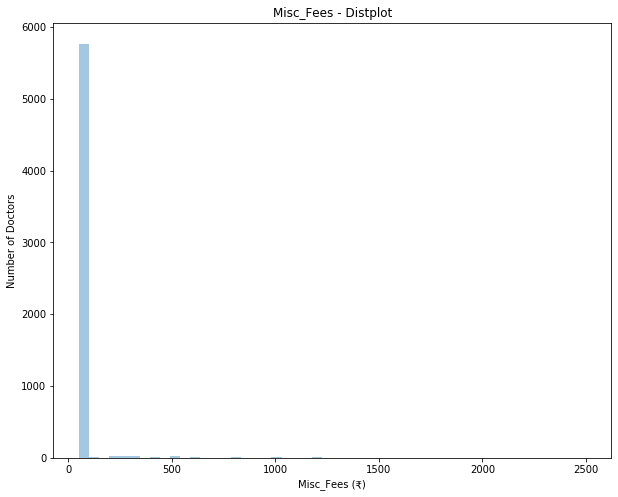

In [118]:
plt.figure(figsize=(10,8))
sns.distplot(df["Misc_Fees"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('Misc_Fees (₹)')
plt.ylabel('Number of Doctors')
plt.title('Misc_Fees - Distplot')

Very few doctors have miscellaneous fee mentioned

Let's clean the text present in the miscellaneous info column

In [119]:
def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [120]:
df['Miscellaneous_Info'] = df['Miscellaneous_Info'].apply(clean_misc)

In [121]:
df['Miscellaneous_Info'] = df['Miscellaneous_Info'].apply(clean_misc)

In [122]:
df = pd.get_dummies(df, columns=['Profile'])

In [123]:
df.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,bhms md homeopathy,24,100,kakkanad ernakulam,100 16 feedback kakkanad ernakulam,100,16,50,0,0,0,0,0,1
1,bams md ayurveda medicine,12,98,whitefield bangalore,98 76 feedback whitefield bangalore,350,76,50,1,0,0,0,0,0
2,mbbs ms otorhinolaryngology,9,0,mathikere bel bangalore,missing,300,0,50,0,0,0,1,0,0
3,bsc zoology bams,12,0,bannerghatta road bangalore,bannerghatta road bangalore 250 available on s...,250,0,250,1,0,0,0,0,0
4,bams,20,100,keelkattalai chennai,100 4 feedback keelkattalai chennai,250,4,50,1,0,0,0,0,0


Let us separate the input output dataframes then split the train-test sets

In [124]:
X = df.drop(labels=['Fees'], axis=1)
y = df['Fees'].values

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [126]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4470, 13), (4470,), (1491, 13), (1491,))

In [127]:
X_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Miscellaneous_Info',
       'Feedback', 'Misc_Fees', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

Let's extract the cleaned qualification, place & miscellaneous info columns from training & validating set for feature extraction

In [129]:
X_train_qual = X_train['Qualification']
X_cv_qual = X_cv['Qualification']

X_train_place = X_train['Place']
X_cv_place = X_cv['Place']

X_train_misc = X_train['Miscellaneous_Info']
X_cv_misc = X_cv['Miscellaneous_Info']

Let's use term frequency (TF), Inverse Document Frequency (IDF) vectorizer (TFidfVectorizer) to transform the qualification, place & miscellaneous features which now contain cleaned texts

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
X_cv_qual = tf1.transform(X_cv_qual)

tf2 = TfidfVectorizer()
X_train_place = tf2.fit_transform(X_train_place)
X_cv_place = tf2.transform(X_cv_place)

tf3 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf3.fit_transform(X_train_misc)
X_cv_misc = tf3.transform(X_cv_misc)

Let's put all the features back together for the machine learning model

In [131]:
X_train_exp = np.array(X_train['Experience']).reshape(-1,1)
X_cv_exp = np.array(X_cv['Experience']).reshape(-1,1)

X_train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
X_cv_feedback = np.array(X_cv['Feedback']).reshape(-1,1)

X_train_rating = np.array(X_train['Rating']).reshape(-1,1)
X_cv_rating = np.array(X_cv['Rating']).reshape(-1,1)

cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath']
X_train_prof = X_train[cols]
X_cv_prof = X_cv[cols]

X_train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
X_cv_miscfees = np.array(X_cv['Misc_Fees']).reshape(-1,1)

In [132]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error,r2_score,mean_absolute_error

In [133]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_cv  = hstack((X_cv_exp, X_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc, X_cv_miscfees))

In [134]:
merged_train.shape, merged_cv.shape

((4470, 8600), (1491, 8600))

Let's observe the performance of different regression algorithms

In [135]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [136]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
XGB = xgb.XGBRegressor()# From the GridSearchCV parameter tuning

In [137]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=91, shuffle=True)

In [61]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(merged_train,y_train)
    print(model)
    pre = model.predict(merged_cv)
    print("\n")
    R2 = r2_score(y_cv,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_cv,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_cv,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  -5.350207912195466


Cross val score =  nan


Mean Squared error
 228445.81572183702


Mean absolute error 
319.62192976622674



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.212304929957028


Cross val score =  nan


Mean Squared error
 28336.968695222364


Mean absolute error 
127.84949640464508



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.16843659320679583


Cross val score =  nan


Mean Squared error
 29915.111979951802


Mean absolute error 
136.6301431472579



****************

In [63]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,-5.350208,NaN,228445.815722,319.621930
1,Ridge,0.212305,NaN,28336.968695,127.849496
2,Lasso,0.168437,NaN,29915.111980,136.630143
3,KNeighborsRegressor,0.087041,NaN,32843.290838,138.737223
4,SVR,0.003539,NaN,35847.241619,148.626353
5,DecisionTreeRegressor,-0.324570,NaN,47650.805500,151.012072
6,RandomForestRegressor,0.240499,NaN,27322.686547,123.451256
7,AdaBoostRegressor,0.097222,NaN,32477.012235,148.905383
8,GradientBoostingRegressor,0.228636,NaN,27749.475400,130.481562
9,XGBoostRegressor,0.252587,NaN,26887.823089,124.713789


Finding the best parameter for XGBoost Regressor using GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [31],
            'learning_rate': [0.3],
            'max_depth': [5,6,7]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(merged_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_j...
                                    num_parallel_tree=1,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact',

Let's retrain the best regressor model with best parameters

In [139]:
XGB = xgb.XGBRegressor(n_estimators=31,learning_rate=0.3,max_depth=6)
XGB.fit(merged_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=31, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Saving the model

In [140]:
from sklearn.externals import joblib
joblib.dump(XGB,'Doctor_Consultation_Fee.pkl')

['Doctor_Consultation_Fee.pkl']

Let's load the test dataset, then preprocess it as we did with training dataset & then predict the results

In [141]:
df_test = pd.read_excel("Doctor_Final_Test.xlsx")
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [142]:
df_test['Experience'] = df_test['Experience'].str.replace('years experience','').astype(int)

In [143]:
df_test['Qualification'] = df_test['Qualification'].apply(clean_text)
df_test['Place'].fillna('missing', inplace=True)

In [144]:
df_test['Place'] = df_test['Place'].apply(clean_place)

In [145]:
df_test['Rating'].fillna('0%', inplace=True)

In [146]:
df_test['Rating'] = df_test['Rating'].apply(clean_rating)
df_test['Rating'] = df_test['Rating'].astype(int)

In [147]:
df_test['Miscellaneous_Info'].fillna('missing', inplace=True)

In [148]:
df_test['Feedback'] = df_test['Miscellaneous_Info'].apply(get_feedback)
df_test['Feedback'] = df_test['Feedback'].str.replace(' Feedback','')
df_test['Feedback'] = df_test['Feedback'].astype(int)

In [149]:
df_test['Misc_Fees'] = df_test['Miscellaneous_Info'].apply(get_fee)
df_test['Misc_Fees'] = df_test['Misc_Fees'].str.replace('₹','')
df_test['Misc_Fees'].fillna(50, inplace=True)
df_test['Misc_Fees'] = df_test['Misc_Fees'].astype(float)

In [150]:
df_test['Miscellaneous_Info'] = df_test['Miscellaneous_Info'].apply(clean_misc)

In [151]:
df_test  = pd.get_dummies(df_test,  columns=['Profile'])

In [152]:

df_test.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,mbbs,35,0,ghatkopar east mumbai,missing,0,50.0,0,0,0,0,1,0
1,mbbs diploma in otorhinolaryngology dlo,31,0,west marredpally hyderabad,missing,0,50.0,0,0,0,1,0,0
2,mbbs ddvl,40,70,kk nagar chennai,70 4 feedback kk nagar chennai,4,50.0,0,0,1,0,0,0
3,bams,0,0,new ashok nagar delhi,missing,0,50.0,1,0,0,0,0,0
4,bds mds conservative dentistry endodontics,16,100,kanakpura road bangalore,general dentistry conservative dentistry cosme...,0,50.0,0,1,0,0,0,0


In [153]:
X_train = df.drop(labels='Fees', axis=1)
y_train = df['Fees'].values
X_test = df_test

In [80]:
X_train_qual = X_train['Qualification']
X_test_qual = X_test['Qualification']

X_train_place = X_train['Place']
X_test_place = X_test['Place']

X_train_misc = X_train['Miscellaneous_Info']
X_test_misc = X_test['Miscellaneous_Info']

In [81]:
tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
X_test_qual = tf1.transform(X_test_qual)

tf3 = TfidfVectorizer()
X_train_place = tf3.fit_transform(X_train_place)
X_test_place = tf3.transform(X_test_place)

tf4 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf4.fit_transform(X_train_misc)
X_test_misc = tf4.transform(X_test_misc)

In [82]:
X_train_exp = np.array(X_train['Experience']).reshape(-1,1)
X_test_exp = np.array(X_test['Experience']).reshape(-1,1)

X_train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
X_test_feedback = np.array(X_test['Feedback']).reshape(-1,1)

X_train_rating = np.array(X_train['Rating']).reshape(-1,1)
X_test_rating = np.array(X_test['Rating']).reshape(-1,1)

cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath']
X_train_prof = X_train[cols]
X_test_prof = X_test[cols]

X_train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
X_test_miscfees = np.array(X_test['Misc_Fees']).reshape(-1,1)

In [83]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_test  = hstack((X_test_exp, X_test_qual, X_test_prof, X_test_place, X_test_rating, X_test_misc, X_test_miscfees))

In [84]:
merged_train.shape, merged_test.shape

((5961, 9982), (1987, 9982))

In [85]:
merged_train

<5961x9982 sparse matrix of type '<class 'numpy.float64'>'
	with 111401 stored elements in COOrdinate format>

In [86]:
merged_test

<1987x9982 sparse matrix of type '<class 'numpy.float64'>'
	with 36258 stored elements in COOrdinate format>

In [87]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.3, 
                   n_estimators=31, 
                   max_depth=6)
xgb.fit(merged_train, y_train)
y_pred1 = xgb.predict(merged_test)
y_pred1

array([219.90172, 310.9723 , 321.39813, ..., 319.2832 , 220.87054,
       394.55792], dtype=float32)

In [88]:
np.savetxt("Doctor_Cosultation_Fee_Prediction.csv", y_pred1, delimiter=",")